In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import pymannkendall as mk


In [3]:
stationCodes = ["227","228","242","251","252"]
stationPaths = [code + ".csv" for code in stationCodes]

In [4]:
temperaturass = []
precipitacoess = []

for path in stationPaths:
    df = pd.read_csv(path)
    df["Ano"] = [datetime.strptime(date, '%Y-%m-%d').year for date in df["Data Medicao"]]

    temperaturas = []
    precipitacoes = []

    anos = list(set(df["Ano"]))
    for ano in anos:
        df_anos = df[df["Ano"] == ano]
        if(len(df_anos)) > 300:
            if(np.count_nonzero(~np.isnan(df_anos["PRECIPITACAO TOTAL, DIARIO(mm)"]))>300):
                precipitacoes.append(np.nansum(df_anos["PRECIPITACAO TOTAL, DIARIO(mm)"]))
            if(np.count_nonzero(~np.isnan(df_anos["TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)"]))>300):
                temperaturas.append(np.nanmean(df_anos["TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)"]))

    temperaturass.append(deepcopy(temperaturas))
    precipitacoess.append(deepcopy(precipitacoes))




Estação: 227


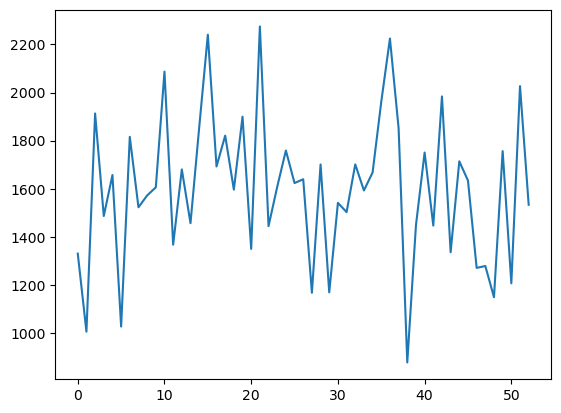

Mann_Kendall_Test(trend='no trend', h=False, p=0.8599591507872586, z=-0.1764261644528668, Tau=-0.01741654571843251, s=-24.0, var_s=16995.333333333332, slope=-0.6521739130433843, intercept=1624.6565217391283)

________________________________________________________
Estação: 228


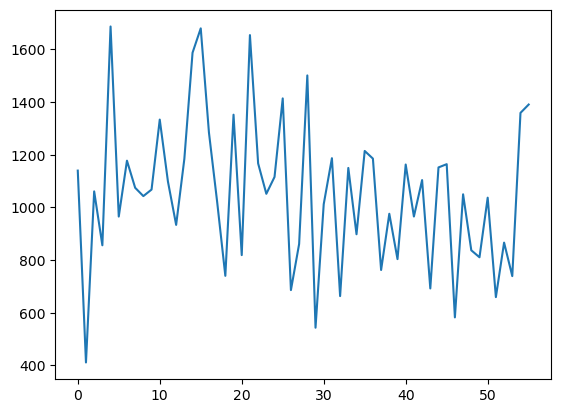

Mann_Kendall_Test(trend='no trend', h=False, p=0.13222513880168085, z=-1.5053849395366676, Tau=-0.13896103896103895, s=-214.0, var_s=20020.0, slope=-4.053114478114482, intercept=1167.8606481481484)

________________________________________________________
Estação: 242


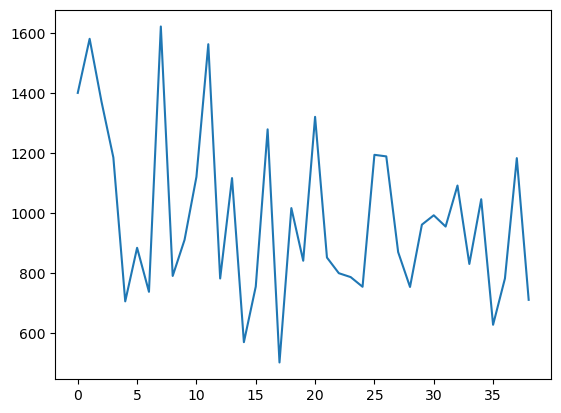

Mann_Kendall_Test(trend='no trend', h=False, p=0.10502173077524635, z=-1.6209809198386187, Tau=-0.18218623481781376, s=-135.0, var_s=6833.666666666667, slope=-6.700000000000001, intercept=1039.0)

________________________________________________________
Estação: 251


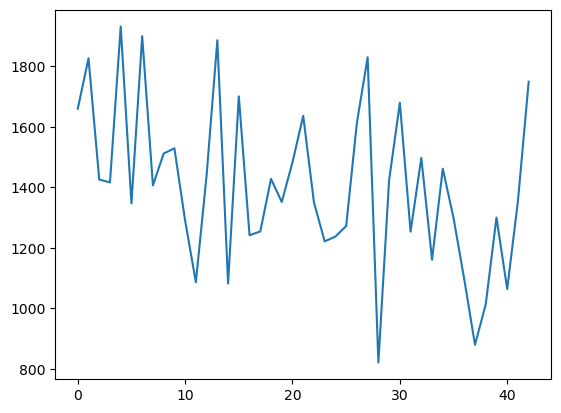

Mann_Kendall_Test(trend='decreasing', h=True, p=0.014328988357313888, z=-2.4489083995347434, Tau=-0.2602436323366556, s=-235.0, var_s=9130.333333333334, slope=-8.523333333333335, intercept=1585.09)

________________________________________________________
Estação: 252


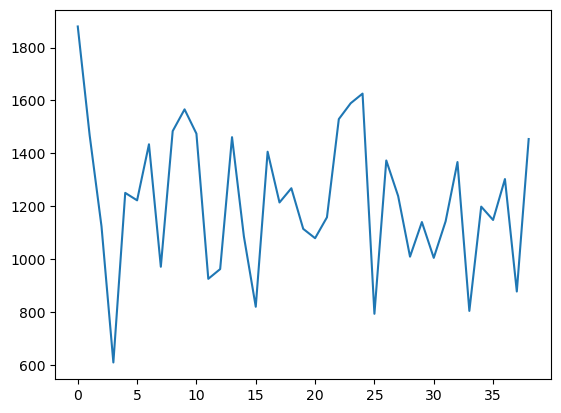

Mann_Kendall_Test(trend='no trend', h=False, p=0.357906094864779, z=-0.9193623127442911, Tau=-0.1039136302294197, s=-77.0, var_s=6833.666666666667, slope=-3.6722222222222296, intercept=1284.3722222222225)

________________________________________________________


In [5]:
for precipitacoes,codigo in zip(precipitacoess,stationCodes):

    print("Estação: " + codigo)
    precipitacoes = precipitacoes[1:-1]
    plt.plot(precipitacoes)
    plt.show()
    print(mk.original_test(precipitacoes))
    print()
    print("________________________________________________________")


Estação: 227


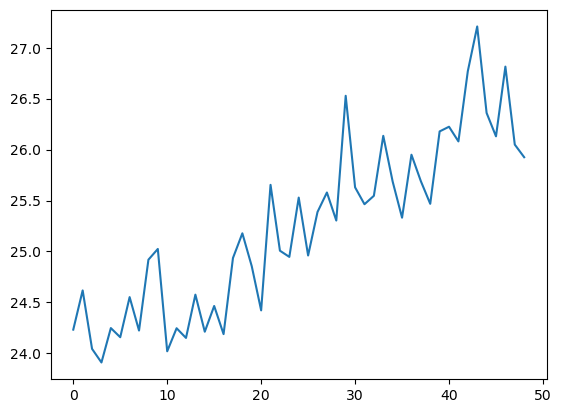

Mann_Kendall_Test(trend='increasing', h=True, p=1.4743761767022079e-12, z=7.07688500451638, Tau=0.6989795918367347, s=822.0, var_s=13458.666666666666, slope=0.05228968509944705, intercept=24.048663995969434)

________________________________________________________
Estação: 228


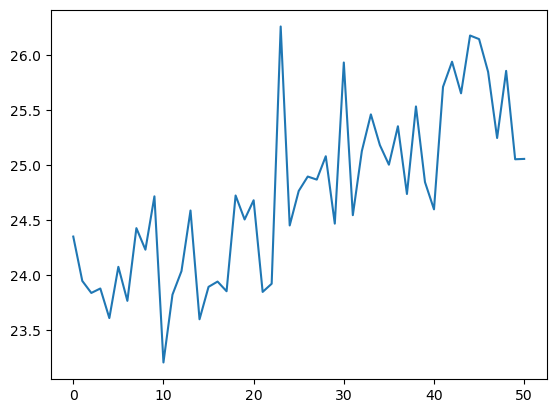

Mann_Kendall_Test(trend='increasing', h=True, p=1.5134495878754706e-09, z=6.042925067836025, Tau=0.5843137254901961, s=745.0, var_s=15158.333333333334, slope=0.040665673124689494, intercept=23.699029404759475)

________________________________________________________
Estação: 242


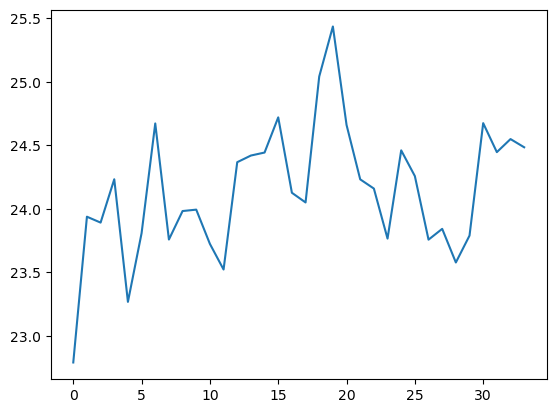

Mann_Kendall_Test(trend='no trend', h=False, p=0.0503678681310844, z=1.956826518670997, Tau=0.23707664884135474, s=133.0, var_s=4550.333333333333, slope=0.01792512582490527, intercept=23.84834558712424)

________________________________________________________
Estação: 251


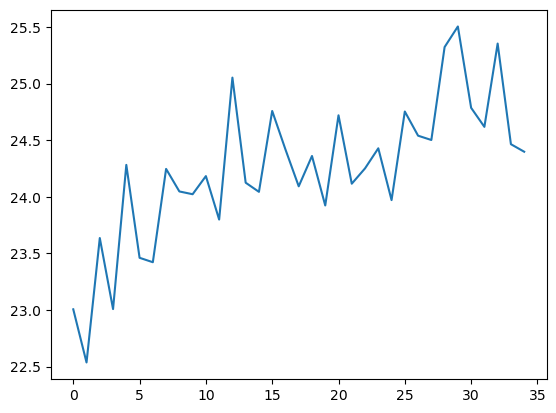

Mann_Kendall_Test(trend='increasing', h=True, p=6.3002190935357305e-06, z=4.5160553918791795, Tau=0.5361344537815126, s=319.0, var_s=4958.333333333333, slope=0.04419498559455868, intercept=23.500082505166475)

________________________________________________________
Estação: 252


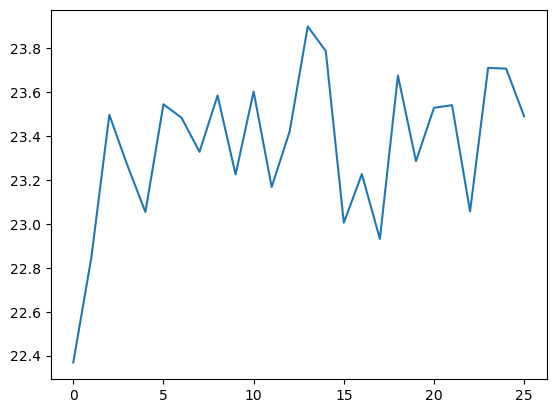

Mann_Kendall_Test(trend='no trend', h=False, p=0.08557050563653745, z=1.7192409585873094, Tau=0.24307692307692308, s=79.0, var_s=2058.3333333333335, slope=0.013335463401555003, intercept=23.285183009670707)

________________________________________________________


In [7]:
for temperaturas,codigo in zip(temperaturass,stationCodes):

    print("Estação: " + codigo)
    temperaturas = temperaturas[1:-1]
    plt.plot(temperaturas)
    plt.show()
    print(mk.original_test(temperaturas))
    print()
    print("________________________________________________________")
